## Pie Charts
### Data Visualization with Python example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Load data
attributes = ['animal_name',
              'hair',
              'feathers',
              'eggs',
              'milk',
              'airborne',
              'aquatic',
              'predator',
              'toothed',
              'backbone',
              'breathes',
              'venomous',
              'fins',
              'legs',
              'tailx',
              'domestic',
              'catsize',
              'type']

zoo = pd.read_csv('zoo.data', header=None, names=attributes)

In [3]:
#For getting total values from categories split by 0 and 1
def get_vals(data):
    df = pd.DataFrame(data.value_counts().rename_axis('att').reset_index(name='count'))
    df_n = df[df['att'] == 0]['count']
    df_y = df[df['att'] == 1]['count']
    return df, df_n, df_y

#For plotting charts
def plot_pie(axes, row, col, title, data, val_n, val_y):
    axes[row][col].set_title(title, fontsize=14)
    axes[row][col].pie(data.value_counts(), labels=['No','Yes'], 
               autopct=lambda pct: pie_abs_labels(pct, [val_n, val_y]),
               colors=['thistle','orange'], textprops={'fontsize':12})

#For inserting values on charts
def pie_abs_labels(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [4]:
#Values for chart descriptions
feathers, f_n, f_y = get_vals(zoo.feathers)
eggs, e_n, e_y = get_vals(zoo.eggs)
airborne, a_n, a_y = get_vals(zoo.airborne)
predator, p_n, p_y = get_vals(zoo.predator)
venomous, v_n, v_y = get_vals(zoo.venomous)
tailx, t_n, t_y = get_vals(zoo.tailx)

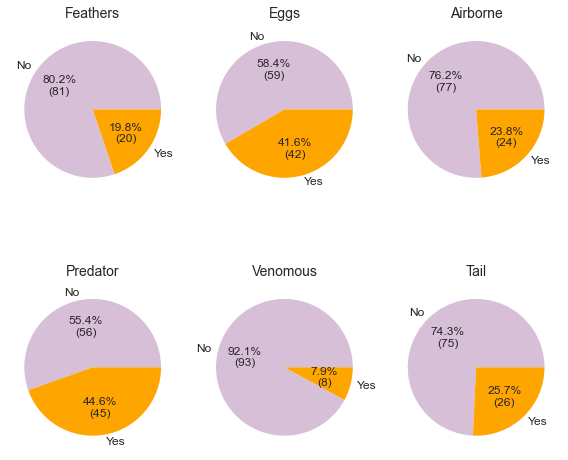

In [6]:
#Plot data
plt.style.use('seaborn')

figure, axes = plt.subplots(2,3)
figure.set_size_inches(8,8)

plot_pie(axes, 0, 0, 'Feathers', zoo.feathers, f_n, f_y)
plot_pie(axes, 0, 1, 'Eggs', zoo.eggs, e_n, e_y)
plot_pie(axes, 0, 2, 'Airborne', zoo.airborne, a_n, a_y)
plot_pie(axes, 1, 0, 'Predator', zoo.predator, p_n, p_y)
plot_pie(axes, 1, 1, 'Venomous', zoo.venomous, v_n, v_y)
plot_pie(axes, 1, 2, 'Tail', zoo.tailx, f_n, f_y)

plt.tight_layout()
plt.savefig('case_10_pie_chart.png', dpi=(300))
plt.show()